In [15]:
pd.set_option('display.max_rows', 10)

In [16]:
# COMPARING REGRESSORS
import sklearn
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier

In [17]:
# Build X and Y variables
df = pd.read_csv('sarscovid_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [18]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(133, 200)

In [19]:
# Perform data splitting using 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
train, test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:06<00:00,  5.94it/s]


In [21]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,52794358519792168107559116637281840273890087755...,-3533160916324552337454832279316559429627753363...,16496858495170604043050724053330194024872361489...,0.05
TransformedTargetRegressor,72464080707022068121600.00,-484951924731609167691776.00,611179648036.12,0.01
LinearRegression,72464080707022068121600.00,-484951924731609167691776.00,611179648036.12,0.01
KernelRidge,5.53,-29.33,4.83,0.01
GaussianProcessRegressor,2.42,-8.48,2.70,0.01
...,...,...,...,...
BayesianRidge,1.10,0.35,0.71,0.01
GammaRegressor,1.10,0.35,0.71,0.01
ElasticNetCV,1.10,0.35,0.71,2.97


In [22]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,52794358519792168107559116637281840273890087755...,-3533160916324552337454832279316559429627753363...,16496858495170604043050724053330194024872361489...,0.05
TransformedTargetRegressor,72464080707022068121600.00,-484951924731609167691776.00,611179648036.12,0.01
LinearRegression,72464080707022068121600.00,-484951924731609167691776.00,611179648036.12,0.01
KernelRidge,5.53,-29.33,4.83,0.01
GaussianProcessRegressor,2.42,-8.48,2.70,0.01
...,...,...,...,...
BayesianRidge,1.10,0.35,0.71,0.01
GammaRegressor,1.10,0.35,0.71,0.01
ElasticNetCV,1.10,0.35,0.71,2.97


[(0, 1)]

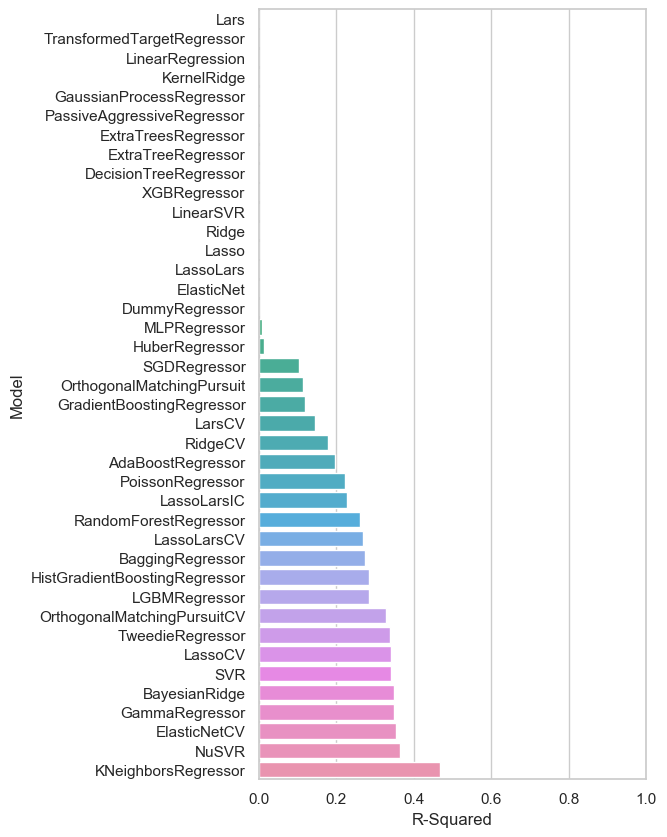

In [23]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0, 10)]

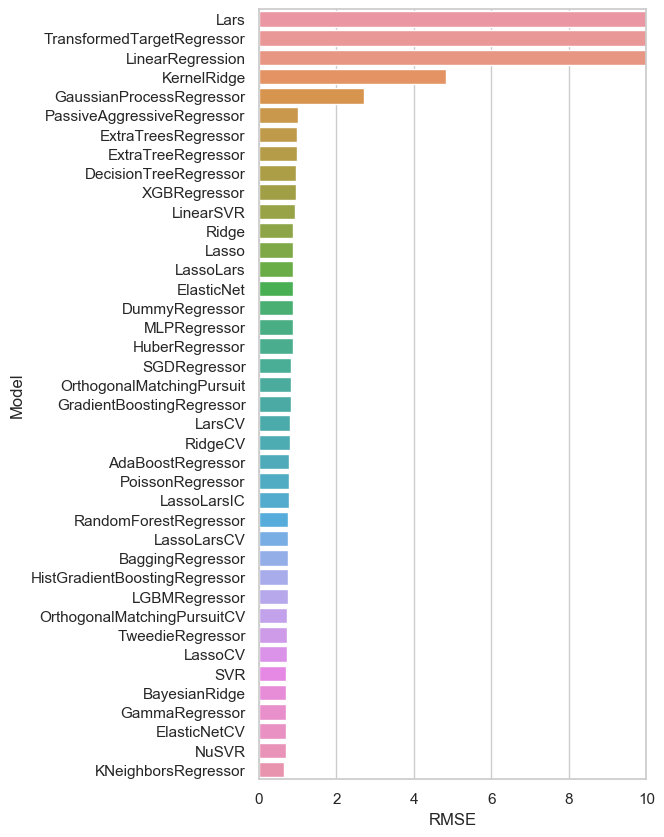

In [24]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0, 10)]

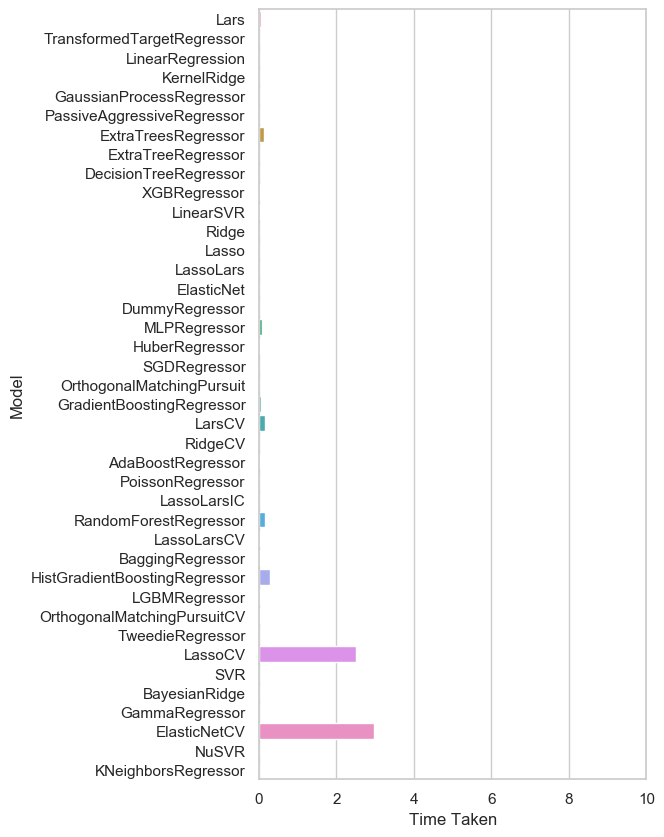

In [25]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))
     

In [26]:
# Saving the highest performance model to pickle for deployment (K Nearest Neighbors)

In [27]:
# Building a model
# import pickle
import math
from sklearn import neighbors
from sklearn.metrics import mean_squared_error

# model = KNeighborsRegressor(n_neighbors=2)
# model.fit(X_train, y_train)

# y_pred_train = model.predict(X_train)
# y_pred_test = model.predict(X_test)

rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = math.sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    

RMSE value for k=  1 is: 1.1705117296987635
RMSE value for k=  2 is: 0.9261642640818232
RMSE value for k=  3 is: 0.7557629288061911
RMSE value for k=  4 is: 0.6620367940058969
RMSE value for k=  5 is: 0.6492129994305071
RMSE value for k=  6 is: 0.6431103094578318
RMSE value for k=  7 is: 0.6725049842195259
RMSE value for k=  8 is: 0.6814657894332011
RMSE value for k=  9 is: 0.7051264440535725
RMSE value for k=  10 is: 0.6996713989265101
RMSE value for k=  11 is: 0.7101839280134888
RMSE value for k=  12 is: 0.7175676443048616
RMSE value for k=  13 is: 0.7306301663422878
RMSE value for k=  14 is: 0.7299896953567098
RMSE value for k=  15 is: 0.7457039458674554
RMSE value for k=  16 is: 0.757616240255969
RMSE value for k=  17 is: 0.7546620807620841
RMSE value for k=  18 is: 0.736313890449115
RMSE value for k=  19 is: 0.7261334780987104
RMSE value for k=  20 is: 0.7342716541086225


In [29]:
# Using pickle to save model KNN where n = 6acetylcholinesterase_model (lowest RMSE)

import pickle

model = neighbors.KNeighborsRegressor(n_neighbors = 6)
model.fit(X_train, y_train)

with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)